In [0]:
import  pandas  as  pd 
import  numpy  as  np 
import  seaborn  as  sns
import  math
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

In [0]:
def calcular_vpl_parcial(receita, tma, t):
    vpl_p = receita/((1.0+tma)**t)
    return vpl_p
   
def monte_carlo_vpl(ha, custo_inicial, receita, receita_10, tma, vida_economica):
    lista_vpl_parcial = []
   
    if (ha <= 300):
        custo_var = np.random.uniform(custo_inicial*0.8, custo_inicial*1.2, 1)
        custo_var.tolist()
    else:
        custo_var = np.random.uniform(custo_inicial*0.7, custo_inicial*1.1, 1)
        custo_var.tolist()
        
    vida_economica_var = np.random.triangular(vida_economica*0.8, vida_economica, vida_economica*1.2, 1)
    vida_economica_var = vida_economica_var.tolist()
    vida_economica_var_int = int(round(vida_economica_var[0]))
    #print(vida_economica_var_int)
    
    receita_var = np.random.normal(loc = receita, scale = receita*0.8, size = vida_economica_var_int)
    receita_var = receita_var.tolist()
    
    receita_10_var = np.random.normal(loc = receita_10, scale = receita*0.8, size = 1)
    receita_10_var = receita_10_var.tolist()
  
    tma_var = np.random.triangular(tma*0.8, tma, tma*1.2, vida_economica_var_int)
    tma_var = tma_var.tolist()
    
    tma_10_var = np.random.triangular(tma*0.8, tma, tma*1.2, 1) 
    tma_10_var = tma_10_var.tolist()
   
    lista_vpl_parcial.append(-custo_var[0])
    
    tempo = 0
    
    while (tempo < (vida_economica_var_int-2)):
        lista_vpl_parcial.append(calcular_vpl_parcial(receita_var[tempo], tma_var[tempo], tempo+1))
        tempo += 1
    
    ultimo_valor = calcular_vpl_parcial(receita_10_var[0], tma_10_var[0], vida_economica_var_int)
    
    lista_vpl_parcial.append(ultimo_valor)
    
    return lista_vpl_parcial

def simulacao_monte_carlo(ha, custo_inicial, receita, receita_10, tma, vida_economica):
    lista_monte_carlo_10000 = []
    for i in range(10000):
        lista_vpls = monte_carlo_vpl(ha, custo_inicial, receita, receita_10, tma, vida_economica)
        vpl_final = sum(lista_vpls)
        lista_monte_carlo_10000.append(vpl_final)
    contador = 0
    for j in lista_monte_carlo_10000:
        if (j >= 0):
            contador += 1
    lucro = (contador/10000)*100
            
    return np.mean(lista_monte_carlo_10000), lista_monte_carlo_10000, lucro, lista_vpls
    

**Simulação para 25 hectares**

In [3]:
cenario_1_25 = simulacao_monte_carlo(25, 898765.07, 78945.72, 161474.55, 0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_25[0])

cenario_2_25 = simulacao_monte_carlo(25, 202686.10, 25404.82, 160288.05, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_25[0])
#print(cenario_1_25[3])
#print(cenario_2_25[3])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_25[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_25[2])

Cenario 1 - VPL Médio: -520799.52
Cenario 2 - VPL Médio: -56796.82
Cenario 1 - Probabilidade de Lucro: 0.00
Cenario 2 - Probabilidade de Lucro: 8.23


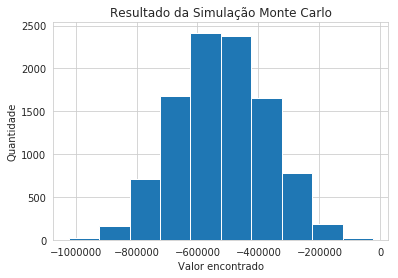

In [4]:
plt.hist(cenario_1_25[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

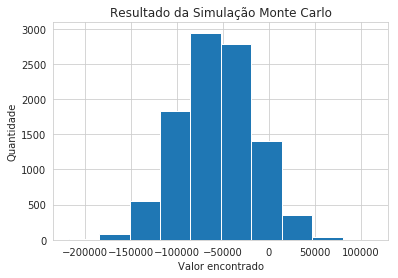

In [5]:
plt.hist(cenario_2_25[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

**Simulação para 50 hectares**

In [6]:
cenario_1_50 = simulacao_monte_carlo(50, 1018757.51, 157891.44, 321672.61, 0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_50[0])

cenario_2_50 = simulacao_monte_carlo(50, 349397.19, 49895.11, 320486.11, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_50[0])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_50[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_50[2])

Cenario 1 - VPL Médio: -263448.73
Cenario 2 - VPL Médio: -62634.55
Cenario 1 - Probabilidade de Lucro: 13.69
Cenario 2 - Probabilidade de Lucro: 20.88


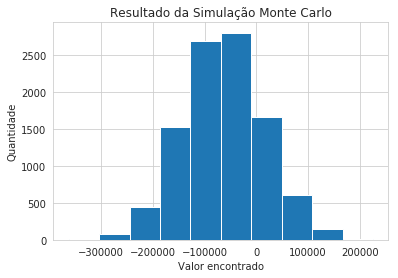

In [7]:
plt.hist(cenario_2_50[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

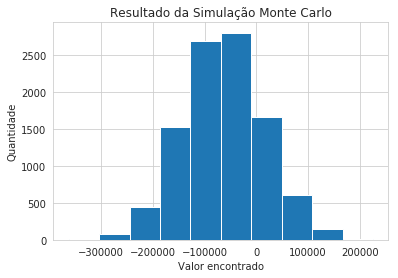

In [8]:
plt.hist(cenario_2_50[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

**Simulação para 100 hectares**

In [9]:
cenario_1_100 = simulacao_monte_carlo(100, 1390072.85, 310629.89, 642293.71, 0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_100[0])

cenario_2_100 = simulacao_monte_carlo(100, 642819.38, 98875.69, 640882.21, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_100[0])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_100[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_100[2])

Cenario 1 - VPL Médio: 91693.35
Cenario 2 - VPL Médio: -71781.89
Cenario 1 - Probabilidade de Lucro: 58.04
Cenario 2 - Probabilidade de Lucro: 31.38


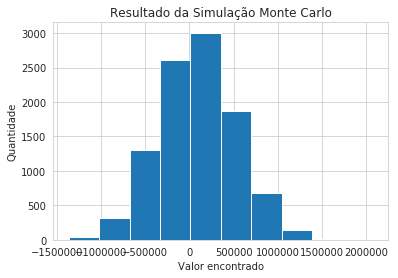

In [10]:
plt.hist(cenario_1_100[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

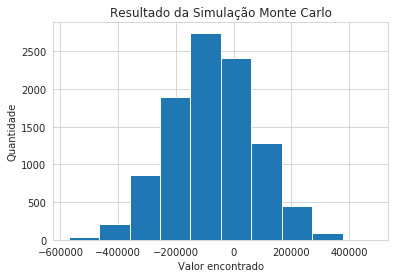

In [11]:
plt.hist(cenario_2_100[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

**Simulação para 300 hectares**

In [12]:
cenario_1_300 = simulacao_monte_carlo(300, 4162758.49, 914745.50, 1926656.14, 0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_300[0])

cenario_2_300 = simulacao_monte_carlo(300, 1946749.14, 279707.90, 1922646.64, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_300[0])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_300[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_300[2])

Cenario 1 - VPL Médio: 215322.24
Cenario 2 - VPL Médio: -304680.57
Cenario 1 - Probabilidade de Lucro: 56.10
Cenario 2 - Probabilidade de Lucro: 24.22


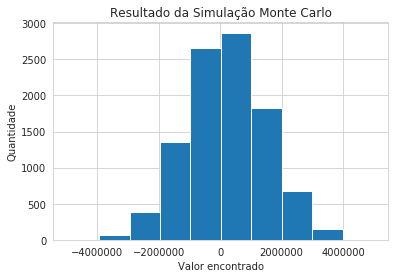

In [13]:
plt.hist(cenario_1_300[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

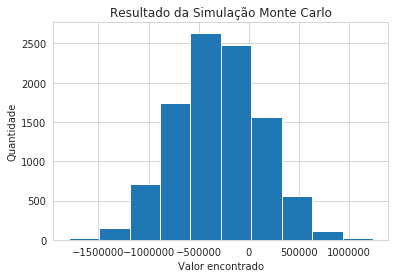

In [14]:
plt.hist(cenario_2_300[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

**Simulação para 500 hectares**

In [15]:
cenario_1_500 = simulacao_monte_carlo(500, 6886428.67, 1524125.83, 3210643.57, 0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_500[0])

cenario_2_500 = simulacao_monte_carlo(500, 3244581.90 , 466179.84, 3204411.07, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_500[0])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_500[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_500[2])

Cenario 1 - VPL Médio: 1105615.61
Cenario 2 - VPL Médio: -183479.62
Cenario 1 - Probabilidade de Lucro: 69.67
Cenario 2 - Probabilidade de Lucro: 40.07


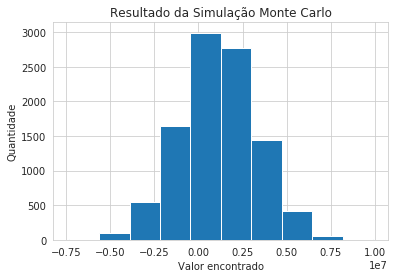

In [16]:
plt.hist(cenario_1_500[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

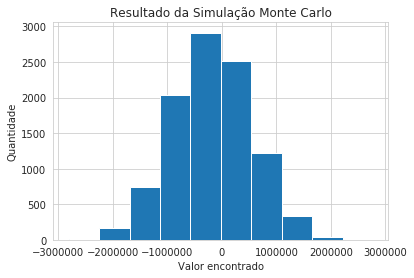

In [17]:
plt.hist(cenario_2_500[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

**Simulação para 700 hectares**

In [18]:
cenario_1_700 = simulacao_monte_carlo(700, 9584347.77, 2133281.16, 4494405.99,  0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_700[0])

cenario_2_700 = simulacao_monte_carlo(700, 4542414.66 , 652651.78 , 4486175.49, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_700[0])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_700[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_700[2])

Cenario 1 - VPL Médio: 1608427.97
Cenario 2 - VPL Médio: -259348.23
Cenario 1 - Probabilidade de Lucro: 70.31
Cenario 2 - Probabilidade de Lucro: 39.74


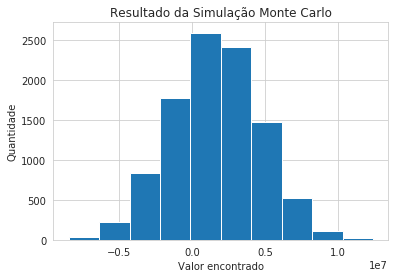

In [19]:
plt.hist(cenario_1_700[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

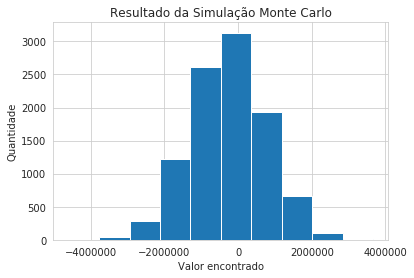

In [20]:
plt.hist(cenario_2_700[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

**Simulação para 900 hectares**

In [21]:
cenario_1_900 = simulacao_monte_carlo(900, 12376687.48, 2743261.49 , 5778993.42, 0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_900[0])

cenario_2_900 = simulacao_monte_carlo(900, 5840247.42, 839123.71 , 5767939.92, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_900[0])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_900[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_900[2])

Cenario 1 - VPL Médio: 2090433.55
Cenario 2 - VPL Médio: -324256.32
Cenario 1 - Probabilidade de Lucro: 70.69
Cenario 2 - Probabilidade de Lucro: 40.57


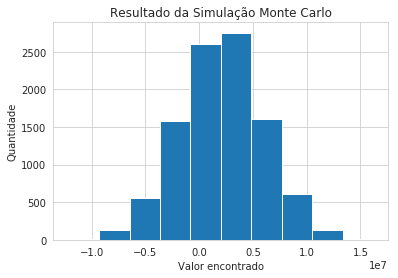

In [22]:
plt.hist(cenario_1_900[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

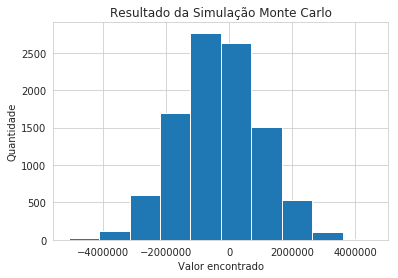

In [23]:
plt.hist(cenario_2_900[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

**Simulação para 1000 hectares**

In [24]:
cenario_1_1000 = simulacao_monte_carlo(1000, 13772857.33 , 3048251.66 , 6421287.13, 0.1615, 10)
print("Cenario 1 - VPL Médio: %.2f" % cenario_1_1000[0])

cenario_2_1000 = simulacao_monte_carlo(1000, 6489163.80 , 932359.68, 6408822.13, 0.1615, 10)
print("Cenario 2 - VPL Médio: %.2f" % cenario_2_1000[0])

print("Cenario 1 - Probabilidade de Lucro: %.2f" % cenario_1_1000[2])
print("Cenario 2 - Probabilidade de Lucro: %.2f" % cenario_2_1000[2])

Cenario 1 - VPL Médio: 2230912.47
Cenario 2 - VPL Médio: -360570.91
Cenario 1 - Probabilidade de Lucro: 69.37
Cenario 2 - Probabilidade de Lucro: 39.94


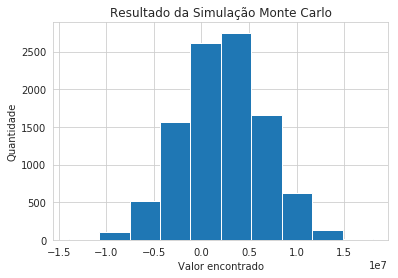

In [25]:
plt.hist(cenario_1_1000[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()

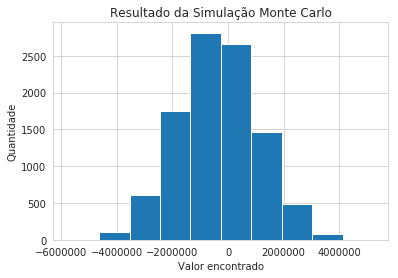

In [26]:
plt.hist(cenario_2_1000[1])
plt.title('Resultado da Simulação Monte Carlo')
plt.xlabel('Valor encontrado')
plt.ylabel('Quantidade')

plt.show()